In [100]:
import pandas as pd

## Read data

In [15]:
df = pd.read_csv("playerstable.csv", delimiter=";").set_index("Playerid")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 1 to 1610
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1610 non-null   object 
 1   Team        1610 non-null   object 
 2   Age         1610 non-null   int64  
 3   Apps        1610 non-null   object 
 4   Mins        1610 non-null   int64  
 5   Goals       1610 non-null   object 
 6   Assists     1610 non-null   object 
 7   Yel         1610 non-null   object 
 8   Red         1610 non-null   object 
 9   SpG         1610 non-null   object 
 10  PS%         1610 non-null   float64
 11  AerialsWon  1610 non-null   object 
 12  MotM        1610 non-null   object 
 13  Rating      1610 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 188.7+ KB


In [17]:
df.head()

,Name,Team,Age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS%,AerialsWon,MotM,Rating
Playerid,,,,,,,,,,,,,,
1,Robert Lewandowski,"Bayern,",33,27,2351,31\t,1\t,2\t,-\t,5\t,77.9,1.6\t,8\t,8.03
2,Kylian Mbappé,"PSG,",23,25(1),2222,15\t,10\t,8\t,-\t,4\t,81.0,0.1\t,8\t,7.81
3,Karim Benzema,"Real Madrid,",34,25,2060,22\t,11\t,-\t,-\t,3.8\t,85.5,0.6\t,10\t,7.77
4,Mohamed Salah,"Liverpool,",29,25(2),2263,20\t,10\t,1\t,-\t,4.3\t,80.0,0.2\t,6\t,7.71
5,Vinícius Júnior,"Real Madrid,",21,25(2),2212,14\t,6\t,6\t,-\t,2.5\t,85.6,0.1\t,6\t,7.67


## Cleaning and Preparation

In [27]:
# Remove "," after team name 
df["Team"] = df["Team"].str.replace(",", "")

In [28]:
df.head()

,Name,Team,Age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS%,AerialsWon,MotM,Rating
Playerid,,,,,,,,,,,,,,
1,Robert Lewandowski,Bayern,33,27,2351,31\t,1\t,2\t,-\t,5\t,77.9,1.6\t,8\t,8.03
2,Kylian Mbappé,PSG,23,25(1),2222,15\t,10\t,8\t,-\t,4\t,81.0,0.1\t,8\t,7.81
3,Karim Benzema,Real Madrid,34,25,2060,22\t,11\t,-\t,-\t,3.8\t,85.5,0.6\t,10\t,7.77
4,Mohamed Salah,Liverpool,29,25(2),2263,20\t,10\t,1\t,-\t,4.3\t,80.0,0.2\t,6\t,7.71
5,Vinícius Júnior,Real Madrid,21,25(2),2212,14\t,6\t,6\t,-\t,2.5\t,85.6,0.1\t,6\t,7.67


In [47]:
# Summing up full time and not full time appearances

df["Apps"] = [int(i.split("(")[0]) if (len(i) < 3) else int(i.split("(")[0]) + int(i.split("(")[1][:-1]) for i in df["Apps"]]

In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 1 to 1610
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1610 non-null   object 
 1   Team        1607 non-null   object 
 2   Age         1610 non-null   int64  
 3   Apps        1610 non-null   int64  
 4   Mins        1610 non-null   int64  
 5   Goals       1610 non-null   object 
 6   Assists     1610 non-null   object 
 7   Yel         1610 non-null   object 
 8   Red         1610 non-null   object 
 9   SpG         1610 non-null   object 
 10  PS%         1610 non-null   float64
 11  AerialsWon  1610 non-null   object 
 12  MotM        1610 non-null   object 
 13  Rating      1610 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 188.7+ KB


In [50]:
df.head()

,Name,Team,Age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS%,AerialsWon,MotM,Rating
Playerid,,,,,,,,,,,,,,
1,Robert Lewandowski,Bayern,33,27,2351,31\t,1\t,2\t,-\t,5\t,77.9,1.6\t,8\t,8.03
2,Kylian Mbappé,PSG,23,26,2222,15\t,10\t,8\t,-\t,4\t,81.0,0.1\t,8\t,7.81
3,Karim Benzema,Real Madrid,34,25,2060,22\t,11\t,-\t,-\t,3.8\t,85.5,0.6\t,10\t,7.77
4,Mohamed Salah,Liverpool,29,27,2263,20\t,10\t,1\t,-\t,4.3\t,80.0,0.2\t,6\t,7.71
5,Vinícius Júnior,Real Madrid,21,27,2212,14\t,6\t,6\t,-\t,2.5\t,85.6,0.1\t,6\t,7.67


In [57]:
# Removing \t from columns

cols = ["Goals", "Assists", "Yel", "Red", "SpG", "AerialsWon", "MotM"]

for col in cols:
    df[col] = df[col].str.replace("\t", "").replace("-", "0").astype(float)

In [58]:
df.head()

,Name,Team,Age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS%,AerialsWon,MotM,Rating
Playerid,,,,,,,,,,,,,,
1,Robert Lewandowski,Bayern,33,27,2351,31.0,1.0,2.0,0.0,5.0,77.9,1.6,8.0,8.03
2,Kylian Mbappé,PSG,23,26,2222,15.0,10.0,8.0,0.0,4.0,81.0,0.1,8.0,7.81
3,Karim Benzema,Real Madrid,34,25,2060,22.0,11.0,0.0,0.0,3.8,85.5,0.6,10.0,7.77
4,Mohamed Salah,Liverpool,29,27,2263,20.0,10.0,1.0,0.0,4.3,80.0,0.2,6.0,7.71
5,Vinícius Júnior,Real Madrid,21,27,2212,14.0,6.0,6.0,0.0,2.5,85.6,0.1,6.0,7.67


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 1 to 1610
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1610 non-null   object 
 1   Team        1607 non-null   object 
 2   Age         1610 non-null   int64  
 3   Apps        1610 non-null   int64  
 4   Mins        1610 non-null   int64  
 5   Goals       1610 non-null   float64
 6   Assists     1610 non-null   float64
 7   Yel         1610 non-null   float64
 8   Red         1610 non-null   float64
 9   SpG         1610 non-null   float64
 10  PS%         1610 non-null   float64
 11  AerialsWon  1610 non-null   float64
 12  MotM        1610 non-null   float64
 13  Rating      1610 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 188.7+ KB


In [60]:
df.nunique()

Name          1607
Team            98
Age             24
Apps            17
Mins          1063
Goals           22
Assists         13
Yel             13
Red              4
SpG             39
PS%            354
AerialsWon      50
MotM            10
Rating         150
dtype: int64

In [62]:
# Removing Categorigal Features 

df.drop(columns=["Name", "Team"], inplace=True)

In [63]:
df.head()

,Age,Apps,Mins,Goals,Assists,Yel,Red,SpG,PS%,AerialsWon,MotM,Rating
Playerid,,,,,,,,,,,,
1,33,27,2351,31.0,1.0,2.0,0.0,5.0,77.9,1.6,8.0,8.03
2,23,26,2222,15.0,10.0,8.0,0.0,4.0,81.0,0.1,8.0,7.81
3,34,25,2060,22.0,11.0,0.0,0.0,3.8,85.5,0.6,10.0,7.77
4,29,27,2263,20.0,10.0,1.0,0.0,4.3,80.0,0.2,6.0,7.71
5,21,27,2212,14.0,6.0,6.0,0.0,2.5,85.6,0.1,6.0,7.67


## Exploratory Data Analysis

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

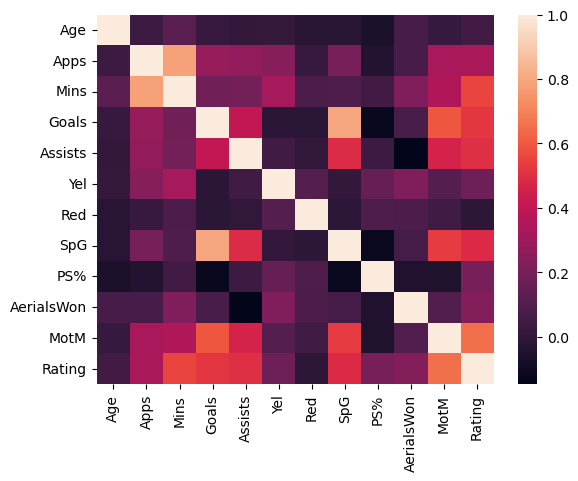

In [77]:
sns.heatmap(df.corr());

In [76]:
# Multicollinearity 
df["Goals"].corr(df["SpG"])

0.7956460553061206

In [80]:
df["Rating"].corr(df["SpG"]), df["Rating"].corr(df["Goals"])

(0.4827474872375472, 0.5188732193914275)

In [82]:
# As Goals have higher correlation with our target-Rating We will get rid of "SpG" column

df.drop(columns="SpG", inplace=True)

## Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [83]:
# Target and features split
target = "Rating"
y = df[target]
X = df.drop(columns=target)

In [86]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Baseline Prediction
y_pred_baseline = [y_train.mean()] * len(y_train)

In [90]:
# Baseline MAE
mean_absolute_error(y_pred_baseline, y_train)

0.21870251195941512

In [87]:
# Creating and fitting the model
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [91]:
# Testing the model on train data

mean_absolute_error(model.predict(X_train), y_train)

0.11066537143899281

In [92]:
# Testing the model on test data

mean_absolute_error(model.predict(X_test), y_test)

0.11076120018890181

## Interactive predictor

In [112]:
# Defining make_prediction function

def make_prediction(age, apps, mins, goals, assists, yel, red, ps, aerialswon, motm):
    data = {
        "Age": age,
        "Apps": apps,
        "Mins": mins,
        "Goals": goals,
        "Assists": assists,
        "Yel": yel,
        "Red": red,
        "PS%": ps,
        "AerialsWon": aerialswon,
        "MotM": motm
    }
    df = pd.DataFrame(data, index=[0])
    prediction = model.predict(df).round(2)[0]
    return f"Predicted Rating: {prediction}"

In [124]:
make_prediction(26, 11, 990, 2, 4, 1, 0, 91.3, 0.5, 4)

'Predicted Rating: 7.18'

In [120]:
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

In [122]:
interact(
    make_prediction,
    age=IntSlider(
        min=X_train["Age"].min(),
        max=X_train["Age"].max(),
        value=X_train["Age"].mean(),
    ),
    apps=IntSlider(
        min=X_train["Apps"].min(),
        max=X_train["Apps"].max(),
        value=X_train["Apps"].mean(),
    ),
    mins=IntSlider(
        min=X_train["Mins"].min(),
        max=X_train["Mins"].max(),
        value=X_train["Mins"].mean(),
    ),
    goals=IntSlider(
        min=X_train["Goals"].min(),
        max=X_train["Goals"].max(),
        value=X_train["Goals"].mean(),
    ),
    assists=IntSlider(
        min=X_train["Assists"].min(),
        max=X_train["Assists"].max(),
        value=X_train["Assists"].mean(),
    ),
    yel=IntSlider(
        min=X_train["Yel"].min(),
        max=X_train["Yel"].max(),
        value=X_train["Yel"].mean(),
    ),
    red=IntSlider(
        min=X_train["Red"].min(),
        max=X_train["Red"].max(),
        value=X_train["Red"].mean(),
    ),
    ps=FloatSlider(
        min=X_train["PS%"].min(),
        max=X_train["PS%"].max(),
        step=0.1,
        value=X_train["PS%"].mean(),
    ),
    aerialswon=FloatSlider(
        min=X_train["AerialsWon"].min(),
        max=X_train["AerialsWon"].max(),
        step=0.1,
        value=X_train["AerialsWon"].mean(),
    ),
    motm=IntSlider(
        min=X_train["MotM"].min(),
        max=X_train["MotM"].max(),
        value=X_train["MotM"].mean(),
    )
);

interactive(children=(IntSlider(value=26, description='age', max=40, min=17), IntSlider(value=21, description=…